<a href="https://colab.research.google.com/github/KrisMatrix/DataScience/blob/main/Medical_Cost_Personal_Datasets_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets

**Kaggle Page:** https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience/main/Medical_Cost_Personal_Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This is a fairly simple medical dataset. Let's get some useful information.

* How many men, women in the dataset?
* How many age groups 16-25, 26-35, 36-45, 46-55, 56-65?
* Percent of men who smoke and Percent of women who smoke.
* Percent of men and women in bmi category:
  * < 18.5 is underweight
  * 18.5 - 24.9 Healthy weight
  * 25-29.9 Overweight
  * 30 and above Obesity

**How many men and women are in the dataset?**

In [3]:
print("No of men in datasets = "+str(len(df[df['sex'] == 'male']['sex'])))
print("No of women in datasets = "+str(len(df[df['sex'] == 'female']['sex'])))

No of men in datasets = 676
No of women in datasets = 662


There are more men than women in this dataset, but they are pretty close. So in terms of gender, they are evenly balanced.

**How many age groups 16-25, 26-35, 36-45, 46-55, 56-65?**

In [4]:
age_groups = {
  'Age_Group': ['16-25', '26-35', '36-45', '46-55', '56-65'],
  'Count': [
    len(df[(df['age'] >= 16) & (df['age'] < 25)]['age']),
    len(df[(df['age'] >= 26) & (df['age'] < 35)]['age']),
    len(df[(df['age'] >= 36) & (df['age'] < 45)]['age']),
    len(df[(df['age'] >= 46) & (df['age'] < 55)]['age']),
    len(df[(df['age'] >= 56) & (df['age'] < 65)]['age'])
  ]
}

age_groups_df = pd.DataFrame(age_groups)
age_groups_df.head()

,Age_Group,Count
0,16-25,278
1,26-35,243
2,36-45,235
3,46-55,258
4,56-65,216


We have the most data for ages 16-25 and the least data for ages 56-65. However, it looks relatively balanced.

**Percent of men who smoke and Percent of women who smoke.**

In [5]:
smokers =  {
  'Group': ['Smoker', 'Non-Smoker'],
  'Count': [
    len(df[df['smoker'] == 'yes']['smoker']),
    len(df[df['smoker'] == 'no']['smoker'])
  ]
}

smokers_df = pd.DataFrame(smokers)
smokers_df.head()

,Group,Count
0,Smoker,274
1,Non-Smoker,1064


We have a lot more non-smokers versus smokers. This tracks with my intuition.

Percent of men and women in bmi category:

| BMI Range | Category |
| --------- | -------- |
| < 18.5    | Underweight |
| 18.5 - 24.9 | Healthy weight |
| 25 - 29.9   | Overweight |
| > 30      | Obesity |

In [6]:
bmi_groups = {
  'BMI_Group': ['Underweight', 'Healthy Weight', 'Overweight', 'Obese'],
  'Count': [
    len(    df[df['bmi'] < 18.5]['bmi']     ),
    len(    df[(df['bmi'] >= 18.5) & (df['bmi'] < 24.9) ]['bmi']     ),
    len(    df[(df['bmi'] >= 25) & (df['bmi'] < 29.9) ]['bmi']     ),
    len(    df[(df['bmi'] >= 30)]['bmi']     )
  ]
}

bmi_groups_df = pd.DataFrame(bmi_groups)
bmi_groups_df.head()

,BMI_Group,Count
0,Underweight,20
1,Healthy Weight,222
2,Overweight,374
3,Obese,707


Wow, We have a lot of people who are obese and overweight in this dataset.

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let's look at the mean and median wages of men and compare with mean and median wages for women.

In [8]:
print("Male Data:")
print("Mean = "+str(df[df['sex'] == 'male']['charges'].mean()) + ", Median = " + str(df[df['sex'] == 'male']['charges'].median()))
print("Female Data:")
print("Mean = "+str(df[df['sex'] == 'female']['charges'].mean()) + ", Median = " + str(df[df['sex'] == 'female']['charges'].median()))

Male Data:
Mean = 13956.751177721893, Median = 9369.61575
Female Data:
Mean = 12569.578843835347, Median = 9412.9625


**Interesting!** The dataset shows mean charges for men to be higher but median charges to be lower.

Now let's look at the mean/median for men and women in each bmi category.

In [9]:
group_1 = {
  'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
  'Age': ['16 - 25', '16 - 25', '26 - 35', '26 - 35', '36 - 45', '36 - 45', '45 - 54', '45 - 54', '55-65', '55-65'],
  'Mean Charge': [
    df[(df['sex'] == 'male') & ((df['age'] >= 16)  & (df['bmi'] <= 25) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['age'] >= 16)  & (df['bmi'] <= 25) )]['charges'].mean(),
    df[(df['sex'] == 'male') & ((df['age'] >= 26)  & (df['bmi'] <= 35) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['age'] >= 26)  & (df['bmi'] <= 35) )]['charges'].mean(),
    df[(df['sex'] == 'male') & ((df['age'] >= 36)  & (df['bmi'] <= 45) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['age'] >= 36)  & (df['bmi'] <= 45) )]['charges'].mean(),
    df[(df['sex'] == 'male') & ((df['age'] >= 46)  & (df['bmi'] <= 55) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['age'] >= 46)  & (df['bmi'] <= 55) )]['charges'].mean(),
    df[(df['sex'] == 'male') & ((df['age'] >= 56)  & (df['bmi'] <= 65) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['age'] >= 56)  & (df['bmi'] <= 65) )]['charges'].mean(),
  ],
  'Median Charge': [
    df[(df['sex'] == 'male') & ((df['age'] >= 16)  & (df['bmi'] <= 25) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['age'] >= 16)  & (df['bmi'] <= 25) )]['charges'].median(),
    df[(df['sex'] == 'male') & ((df['age'] >= 26)  & (df['bmi'] <= 35) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['age'] >= 26)  & (df['bmi'] <= 35) )]['charges'].median(),
    df[(df['sex'] == 'male') & ((df['age'] >= 36)  & (df['bmi'] <= 45) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['age'] >= 36)  & (df['bmi'] <= 45) )]['charges'].median(),
    df[(df['sex'] == 'male') & ((df['age'] >= 46)  & (df['bmi'] <= 55) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['age'] >= 46)  & (df['bmi'] <= 55) )]['charges'].median(),
    df[(df['sex'] == 'male') & ((df['age'] >= 56)  & (df['bmi'] <= 65) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['age'] >= 56)  & (df['bmi'] <= 65) )]['charges'].median(),
  ],
}


group_1_df = pd.DataFrame(group_1)
group_1_df

,Sex,Age,Mean Charge,Median Charge
0,Male,16 - 25,9574.481206,7198.073100
1,Female,16 - 25,10912.823025,9264.797000
2,Male,26 - 35,14082.042972,10072.055050
3,Female,26 - 35,12612.494511,9863.664925
4,Male,36 - 45,16839.543336,11244.376900
5,Female,36 - 45,14888.907459,11445.379825
6,Male,45 - 54,17984.053605,11945.132700
7,Female,45 - 54,16435.387793,12235.839200
8,Male,55-65,19596.452938,13136.470050
9,Female,55-65,18024.642298,13539.114375


If you look at mean data, the young women (below 25) rack up more medical charges than the men. But after the age 25, the data flips. Men pay more. 

However, the median data is more mixed and appears balanced. Young women (below 25) pay more for insurance, but after that it is more balanced.

I suspect that this means men are more unhealthy in some measure thus causing them to rack up more charges. 

In [10]:
group_2 = {
  'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
  'BMI': ['< 18.5', '< 18.5', '18.5 - 24.9', '18.5 - 24.9', '25 - 29.9', '25 - 29.9', '> 30', '> 30'],
  'Mean Charge': [
    df[(df['sex'] == 'male') & (df['bmi'] < 18.5)]['charges'].mean(),
    df[(df['sex'] == 'female') & (df['bmi'] < 18.5)]['charges'].mean(),
    df[(df['sex'] == 'male') & ((df['bmi'] >= 18.5)  & (df['bmi'] < 24.9) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['bmi'] >= 18.5)  & (df['bmi'] < 24.9) )]['charges'].mean(),
    df[(df['sex'] == 'male') & ((df['bmi'] >= 25)  & (df['bmi'] < 29.9) )]['charges'].mean(),
    df[(df['sex'] == 'female') & ((df['bmi'] >= 25)  & (df['bmi'] < 29.9) )]['charges'].mean(),
    df[(df['sex'] == 'male') & (df['bmi'] >= 35)]['charges'].mean(),
    df[(df['sex'] == 'female') & (df['bmi'] >= 35)]['charges'].mean()
  ],
  'Median Charge': [
    df[(df['sex'] == 'male') & (df['bmi'] < 18.5)]['charges'].median(),
    df[(df['sex'] == 'female') & (df['bmi'] < 18.5)]['charges'].median(),
    df[(df['sex'] == 'male') & ((df['bmi'] >= 18.5)  & (df['bmi'] < 24.9) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['bmi'] >= 18.5)  & (df['bmi'] < 24.9) )]['charges'].median(),
    df[(df['sex'] == 'male') & ((df['bmi'] >= 25)  & (df['bmi'] < 29.9) )]['charges'].median(),
    df[(df['sex'] == 'female') & ((df['bmi'] >= 25)  & (df['bmi'] < 29.9) )]['charges'].median(),
    df[(df['sex'] == 'male') & (df['bmi'] >= 35)]['charges'].median(),
    df[(df['sex'] == 'female') & (df['bmi'] >= 35)]['charges'].median()
  ],
}


group_2_df = pd.DataFrame(group_2)
group_2_df

,Sex,BMI,Mean Charge,Median Charge
0,Male,< 18.5,5611.706381,3945.846275
1,Female,< 18.5,11012.530054,9817.645075
2,Male,18.5 - 24.9,9772.747038,7914.621050
3,Female,18.5 - 24.9,10933.946160,9229.317750
4,Male,25 - 29.9,11354.067287,9223.829500
5,Female,25 - 29.9,10691.761190,8516.293850
6,Male,> 30,18187.753448,11264.541000
7,Female,> 30,15535.224017,10713.644000


Mmm.. Interesting. The data shows that men who are underweight pay very little. And as their BMI increases, their charges increase.

Women on the other hands start much higher even when they are underweight but their charges don't grow at the same rate.

I wonder why this is happening? Is that women irrespective of size (BMI) incur a set of expenses no matter what?

*Presumably, women's biological functions cause them to incur some costs throughout their lives.*

It is interesting to observe that men's charges increase much faster. And they end up being more expesnive the more obese they are.

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Deep Learning

Let's start applying machine learning concepts. 

* First, we need to change the dataframe which has non-numerical data into numerical data, since machine learning is a mathematical concepts and needs numbers. We can do this by converting the string-based features into number - a concept called one-hot encoding.
* Second, shuffle the data.
* Third, we separate the data into an input(X) and output(y). The ouput(y) is the charges column, the input is everything other than the charges column. We will also remove the index column since that is not really data.
* Fourth, let's split the data into train, test and validation dataset (60/20/20 split)
* Fifth, then prepare a machine learning model. 

In [29]:
# One-Hot encode that dataset
df_onehot = pd.get_dummies(df)
df_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [30]:
# Shuffle the data
from sklearn.utils import shuffle
df_shuffle = shuffle(df_onehot)
df_shuffle.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
747,19,21.755,0,1627.28245,0,1,1,0,0,1,0,0
1304,42,24.605,2,21259.37795,0,1,0,1,1,0,0,0
812,54,21.010,2,11013.71190,0,1,1,0,0,0,1,0
130,59,26.505,0,12815.44495,1,0,1,0,1,0,0,0
1126,55,29.900,0,10214.63600,0,1,1,0,0,0,0,1


In [36]:
# Separate the dataset into X and y
y = df_shuffle['charges']
X = df_shuffle.drop(['charges'], axis=1)
# X.head(), y.head()

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 747    19  21.755         0           0         1          1           0   
 1304   42  24.605         2           0         1          0           1   
 812    54  21.010         2           0         1          1           0   
 130    59  26.505         0           1         0          1           0   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 747                  0                 1                 0                 0  
 1304                 1                 0                 0                 0  
 812                  0                 0                 1                 0  
 130                  1                 0                 0                 0  
 1126                 0                 0                 0                 1  ,
 747      1627.28245
 1304    21259.37795
 812     1101

In [39]:
# Let's split the data into train, test and validation dataset.

from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (802, 11)
X_test shape: (268, 11)
X_val shape: (268, 11)
y_train shape: (802,)
y_test shape: (268,)
y val shape: (268,)


In [40]:
# This is not a classification problem. It may be a regression problem.

**Difference between Optimizer, Loss Function and Metric.**

**Optimizer:** The optimizer function is the methodology used for minimizing the loss function. There are many different methodologies like Adam, Stochastic Gradient Descent, etc.

**Loss Function:** The Loss function is a methodology that compares the actual output vs the y calculated by the ML model. There are different methodologies such as Mean Absolute Error (MAE), Mean Squared Error (MSE), etc.

**Metrics:** A metric is used to judge the performance of your model. This is only for you to look at and has nothing to do with the optimization process.



## Model 1 - A NN with 3 layers Input > 100 > 10 > 1 (Output) 

* Optimizer = Adam
* Loss Function = Mean Absolute Error
* Metrics = Mean Absolute Error

In [55]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 4. Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 0s 2ms/step - loss: 13455.2871 - mae: 13455.2871
Epoch 2/1000
26/26 [==============================] - 0s 3ms/step - loss: 13348.2832 - mae: 13348.2832
Epoch 3/1000
26/26 [==============================] - 0s 2ms/step - loss: 13162.5420 - mae: 13162.5420
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: 12832.3643 - mae: 12832.3643
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 12291.3838 - mae: 12291.3838
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: 11463.9404 - mae: 11463.9404
Epoch 7/1000
26/26 [==============================] - 0s 2ms/step - loss: 10429.9795 - mae: 10429.9795
Epoch 8/1000
26/26 [==============================] - 0s 2ms/step - loss: 9311.6348 - mae: 9311.6348
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: 8322.7920 - mae: 8322.7920
Epoch 10/1000
26/26 [==============================] - 0s 2ms/step - loss: 77

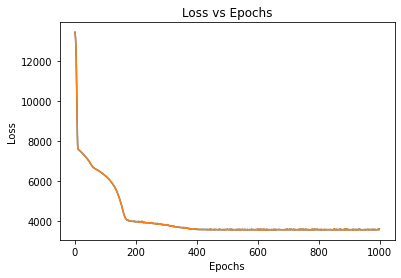

In [56]:
fig, ax = plt.subplots(1)
#pd.DataFrame(history_1.history).plot()
ax.plot(pd.DataFrame(history_1.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

The loss drops precipitously pretty quickly, then moderately fast until aout 175 epochs, then slow between 200-400 epochs. After that, it basically flat-lines.

## Model 2 - A NN with 3 layers Input > 100 > 10 > 1 (Output) 

* Optimizer = Adam
* Loss Function = Mean Squared Error
* Metrics = Mean Squared Error

In [58]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])

# 4. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 1s 2ms/step - loss: 332981952.0000 - mse: 332981952.0000
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 330003232.0000 - mse: 330003232.0000
Epoch 3/1000
26/26 [==============================] - 0s 2ms/step - loss: 324961120.0000 - mse: 324961120.0000
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: 316355200.0000 - mse: 316355200.0000
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 302656864.0000 - mse: 302656864.0000
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: 283337376.0000 - mse: 283337376.0000
Epoch 7/1000
26/26 [==============================] - 0s 3ms/step - loss: 259429504.0000 - mse: 259429504.0000
Epoch 8/1000
26/26 [==============================] - 0s 2ms/step - loss: 231184528.0000 - mse: 231184528.0000
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: 203051472.0000 - mse: 203051472.0000
E

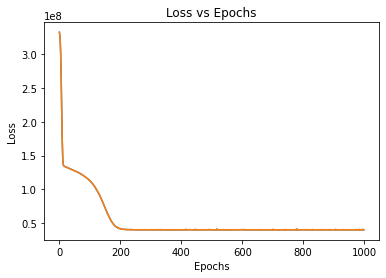

In [59]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_2.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

## Model 3 - A NN with 3 layers Input > 100 > 10 > 1 (Output) 

* Optimizer = SGD
* Loss Function = Mean Squared Error
* Metrics = Mean Squared Error

In [63]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 4. Fit the model
history_3 = model_3.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/1000
26/26 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/1000
26/26 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/1000
26/26

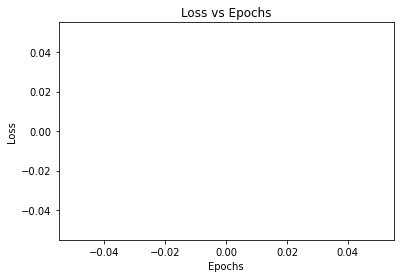

In [61]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_3.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

## Model 4 - A NN with 3 layers Input > 100 > 10 > 1 (Output) 

* Optimizer = RMSProp
* Loss Function = Mean Abs Error
* Metrics = Mean Abs Error

In [67]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_4 = model_4.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 1s 2ms/step - loss: 13426.2480 - mae: 13426.2480
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 13283.0498 - mae: 13283.0498
Epoch 3/1000
26/26 [==============================] - 0s 3ms/step - loss: 13079.7246 - mae: 13079.7246
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: 12798.7607 - mae: 12798.7607
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 12434.3281 - mae: 12434.3281
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: 11973.2822 - mae: 11973.2822
Epoch 7/1000
26/26 [==============================] - 0s 2ms/step - loss: 11422.3740 - mae: 11422.3740
Epoch 8/1000
26/26 [==============================] - 0s 2ms/step - loss: 10795.2627 - mae: 10795.2627
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: 10139.5195 - mae: 10139.5195
Epoch 10/1000
26/26 [==============================] - 0s 2ms/step - loss

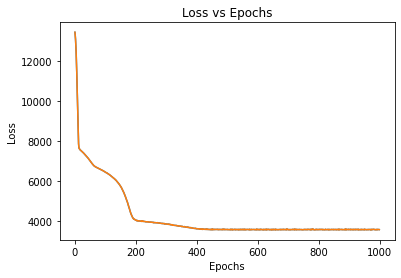

In [68]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_4.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

## Model 5 - A NN with 4 layers Input > 100 > 200 > 10 > 1 (Output) 

* Optimizer = RMSProp
* Loss Function = Mean Abs Error
* Metrics = Mean Abs Error

In [70]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_5 = model_5.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 1s 3ms/step - loss: 12999.4062 - mae: 12999.4062
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 10546.4512 - mae: 10546.4512
Epoch 3/1000
26/26 [==============================] - 0s 2ms/step - loss: 7940.0430 - mae: 7940.0430
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: 7547.4365 - mae: 7547.4365
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 7499.9756 - mae: 7499.9756
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: 7449.0474 - mae: 7449.0474
Epoch 7/1000
26/26 [==============================] - 0s 3ms/step - loss: 7382.7236 - mae: 7382.7236
Epoch 8/1000
26/26 [==============================] - 0s 2ms/step - loss: 7322.6323 - mae: 7322.6323
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: 7303.8970 - mae: 7303.8970
Epoch 10/1000
26/26 [==============================] - 0s 2ms/step - loss: 7218.2881 - 

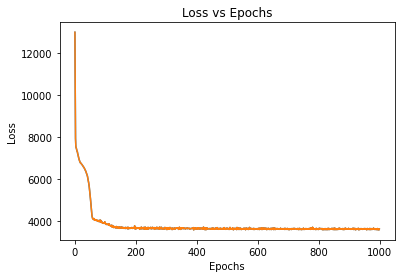

In [71]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_5.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

## Model 6 - A NN with 4 layers Input > 100 > 200 > 1000 > 200 > 100 > 10 > 1 (Output) 

* Optimizer = RMSProp
* Loss Function = Mean Abs Error
* Metrics = Mean Abs Error

In [72]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_6 = model_6.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 1s 9ms/step - loss: 8311.6143 - mae: 8311.6143
Epoch 2/1000
26/26 [==============================] - 0s 9ms/step - loss: 7492.7495 - mae: 7492.7495
Epoch 3/1000
26/26 [==============================] - 0s 9ms/step - loss: 7284.7739 - mae: 7284.7739
Epoch 4/1000
26/26 [==============================] - 0s 9ms/step - loss: 7249.4082 - mae: 7249.4082
Epoch 5/1000
26/26 [==============================] - 0s 9ms/step - loss: 7326.8589 - mae: 7326.8589
Epoch 6/1000
26/26 [==============================] - 0s 9ms/step - loss: 7186.3926 - mae: 7186.3926
Epoch 7/1000
26/26 [==============================] - 0s 10ms/step - loss: 7110.4272 - mae: 7110.4272
Epoch 8/1000
26/26 [==============================] - 0s 9ms/step - loss: 7221.0000 - mae: 7221.0000
Epoch 9/1000
26/26 [==============================] - 0s 9ms/step - loss: 7050.9800 - mae: 7050.9800
Epoch 10/1000
26/26 [==============================] - 0s 9ms/step - loss: 7042.8242 - mae

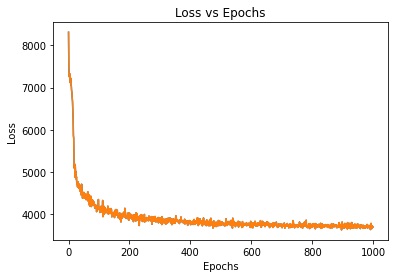

In [73]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_6.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

We are not seeing much improvement. Why not try normalizing data.

In [90]:
df_shuffle.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
747,19,21.755,0,1627.28245,0,1,1,0,0,1,0,0
1304,42,24.605,2,21259.37795,0,1,0,1,1,0,0,0
812,54,21.010,2,11013.71190,0,1,1,0,0,0,1,0
130,59,26.505,0,12815.44495,1,0,1,0,1,0,0,0
1126,55,29.900,0,10214.63600,0,1,1,0,0,0,0,1


Let's normalize the age and bmi data

In [98]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

In [100]:
X_normal

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [101]:
# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2

## Model 7 - A NN with 4 layers Input > 100 > 200 > 1000 > 200 > 100 > 10 > 1 (Output) 

* Optimizer = RMSProp
* Loss Function = Mean Abs Error
* Metrics = Mean Abs Error

In [103]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
26/26 [==============================] - 1s 10ms/step - loss: 9215.3252 - mae: 9215.3252
Epoch 2/1000
26/26 [==============================] - 0s 9ms/step - loss: 5805.2144 - mae: 5805.2144
Epoch 3/1000
26/26 [==============================] - 0s 9ms/step - loss: 4238.7661 - mae: 4238.7661
Epoch 4/1000
26/26 [==============================] - 0s 9ms/step - loss: 3974.3464 - mae: 3974.3464
Epoch 5/1000
26/26 [==============================] - 0s 9ms/step - loss: 4095.4607 - mae: 4095.4607
Epoch 6/1000
26/26 [==============================] - 0s 9ms/step - loss: 3954.1238 - mae: 3954.1238
Epoch 7/1000
26/26 [==============================] - 0s 9ms/step - loss: 3930.9224 - mae: 3930.9224
Epoch 8/1000
26/26 [==============================] - 0s 9ms/step - loss: 3927.7227 - mae: 3927.7227
Epoch 9/1000
26/26 [==============================] - 0s 10ms/step - loss: 3984.1475 - mae: 3984.1475
Epoch 10/1000
26/26 [==============================] - 0s 9ms/step - loss: 3896.6592 - ma

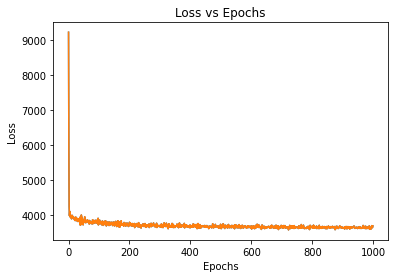

In [104]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

With normalization, we get to low errors real fast. Normalization is an imporvement. But we don't imporve the overall loss further.

In [110]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 6ms/step - loss: 11941.9873 - mae: 11941.9873
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 8113.9590 - mae: 8113.9590
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 7541.7319 - mae: 7541.7319
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 6944.3442 - mae: 6944.3442
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 6165.0044 - mae: 6165.0044
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 4824.0747 - mae: 4824.0747
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 3894.9685 - mae: 3894.9685
Epoch 8/100
26/26 [==============================] - 0s 6ms/step - loss: 3692.9221 - mae: 3692.9221
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 3676.3904 - mae: 3676.3904
Epoch 10/100
26/26 [==============================] - 0s 6ms/step - loss: 3657.4670 - mae: 3657.46

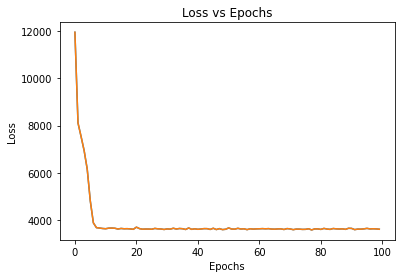

In [111]:
fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

Epoch 1/1000
26/26 [==============================] - 1s 7ms/step - loss: 13068.1670 - mae: 13068.1670
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 10343.4746 - mae: 10343.4746
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 7886.2891 - mae: 7886.2891
Epoch 4/1000
26/26 [==============================] - 0s 7ms/step - loss: 7444.6118 - mae: 7444.6118
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 6991.4170 - mae: 6991.4170
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 6299.7627 - mae: 6299.7627
Epoch 7/1000
26/26 [==============================] - 0s 7ms/step - loss: 5483.4893 - mae: 5483.4893
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 4776.1064 - mae: 4776.1064
Epoch 9/1000
26/26 [==============================] - 0s 6ms/step - loss: 4239.6055 - mae: 4239.6055
Epoch 10/1000
26/26 [==============================] - 0s 7ms/step - loss: 3835.8735 - 

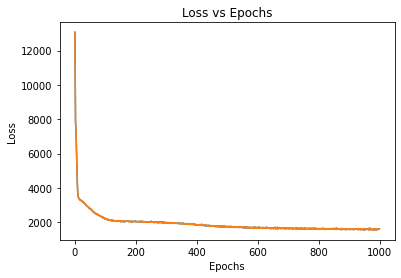

In [114]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

In [116]:
loss, mae = model_7.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 1637.2926 - mae: 1637.2926


The MAE is around 1600. This is better all the previous runs.

## Feature Engineering

Let's remove certain columns and see if we can improve the losses by feature engineering.

Let's start with one column at a time:
* region
* sex
* smoker
* children
* bmi
* age

In [117]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2

Epoch 1/1000
26/26 [==============================] - 1s 7ms/step - loss: 13137.6299 - mae: 13137.6299
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 11082.2354 - mae: 11082.2354
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 8154.1533 - mae: 8154.1533
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 7474.2515 - mae: 7474.2515
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 6984.9453 - mae: 6984.9453
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 6233.3970 - mae: 6233.3970
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 5308.7446 - mae: 5308.7446
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 4578.9487 - mae: 4578.9487
Epoch 9/1000
26/26 [==============================] - 0s 6ms/step - loss: 4091.5012 - mae: 4091.5012
Epoch 10/1000
26/26 [==============================] - 0s 6ms/step - loss: 3750.2766 - 

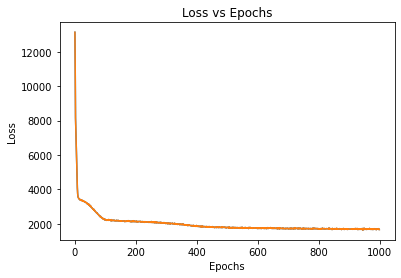

In [121]:
#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

In [122]:
loss, mae = model_7.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1706.8217 - mae: 1706.8217


Epoch 1/1000
26/26 [==============================] - 2s 11ms/step - loss: 13122.2598 - mae: 13122.2598
Epoch 2/1000
26/26 [==============================] - 0s 13ms/step - loss: 10892.1982 - mae: 10892.1982
Epoch 3/1000
26/26 [==============================] - 0s 10ms/step - loss: 8104.7656 - mae: 8104.7656
Epoch 4/1000
26/26 [==============================] - 0s 10ms/step - loss: 7851.4775 - mae: 7851.4775
Epoch 5/1000
26/26 [==============================] - 0s 9ms/step - loss: 7783.9355 - mae: 7783.9355
Epoch 6/1000
26/26 [==============================] - 0s 12ms/step - loss: 7686.9512 - mae: 7686.9512
Epoch 7/1000
26/26 [==============================] - 0s 11ms/step - loss: 7613.3540 - mae: 7613.3540
Epoch 8/1000
26/26 [==============================] - 0s 10ms/step - loss: 7532.2437 - mae: 7532.2437
Epoch 9/1000
26/26 [==============================] - 0s 10ms/step - loss: 7432.6494 - mae: 7432.6494
Epoch 10/1000
26/26 [==============================] - 0s 13ms/step - loss: 731

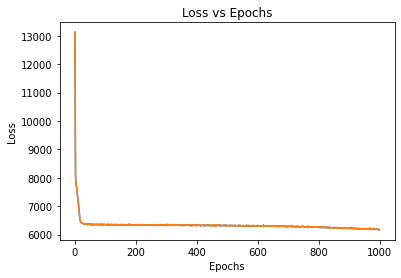

In [123]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2




#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

Epoch 1/1000
26/26 [==============================] - 1s 7ms/step - loss: 13124.3164 - mae: 13124.3164
Epoch 2/1000
26/26 [==============================] - 0s 7ms/step - loss: 10919.5869 - mae: 10919.5869
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 8045.5762 - mae: 8045.5762
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 7408.7554 - mae: 7408.7554
Epoch 5/1000
26/26 [==============================] - 0s 7ms/step - loss: 6900.1177 - mae: 6900.1177
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 6122.4204 - mae: 6122.4204
Epoch 7/1000
26/26 [==============================] - 0s 7ms/step - loss: 5211.2393 - mae: 5211.2393
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 4557.1118 - mae: 4557.1118
Epoch 9/1000
26/26 [==============================] - 0s 6ms/step - loss: 4148.0386 - mae: 4148.0386
Epoch 10/1000
26/26 [==============================] - 0s 6ms/step - loss: 3809.0376 - 

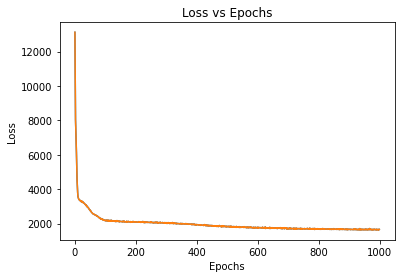

In [124]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2




#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

Epoch 1/1000
26/26 [==============================] - 1s 7ms/step - loss: 13091.0713 - mae: 13091.0713
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 10649.9629 - mae: 10649.9629
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 8137.1592 - mae: 8137.1592
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 7698.8042 - mae: 7698.8042
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 7260.3179 - mae: 7260.3179
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 6651.3169 - mae: 6651.3169
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 5924.7769 - mae: 5924.7769
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 5112.0376 - mae: 5112.0376
Epoch 9/1000
26/26 [==============================] - 0s 5ms/step - loss: 4463.0493 - mae: 4463.0493
Epoch 10/1000
26/26 [==============================] - 0s 6ms/step - loss: 4034.7395 - 

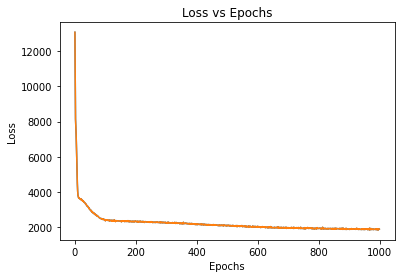

In [125]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "sex", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2




#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

Epoch 1/1000
26/26 [==============================] - 1s 6ms/step - loss: 13085.5488 - mae: 13085.5488
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 10597.5527 - mae: 10597.5527
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 8141.4951 - mae: 8141.4951
Epoch 4/1000
26/26 [==============================] - 0s 7ms/step - loss: 7696.2798 - mae: 7696.2798
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 7225.0898 - mae: 7225.0898
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 6590.8184 - mae: 6590.8184
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 5811.7046 - mae: 5811.7046
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 5036.4863 - mae: 5036.4863
Epoch 9/1000
26/26 [==============================] - 0s 6ms/step - loss: 4353.9194 - mae: 4353.9194
Epoch 10/1000
26/26 [==============================] - 0s 6ms/step - loss: 3850.8569 - 

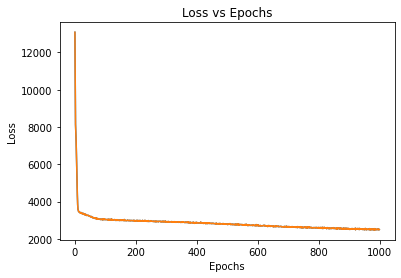

In [126]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "children"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "sex", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2




#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

Epoch 1/1000
26/26 [==============================] - 1s 6ms/step - loss: 13093.7568 - mae: 13093.7568
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 10773.6025 - mae: 10773.6025
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 8508.3232 - mae: 8508.3232
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 8128.7729 - mae: 8128.7729
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 7789.3984 - mae: 7789.3984
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 7310.8291 - mae: 7310.8291
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 6827.1470 - mae: 6827.1470
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 6334.5986 - mae: 6334.5986
Epoch 9/1000
26/26 [==============================] - 0s 6ms/step - loss: 6013.5376 - mae: 6013.5376
Epoch 10/1000
26/26 [==============================] - 0s 7ms/step - loss: 5748.6367 - 

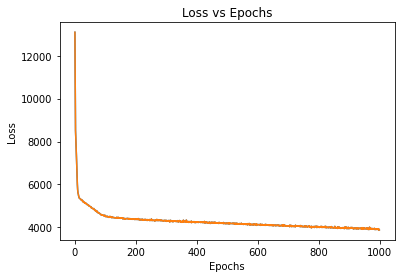

In [127]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["bmi", "children"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "sex", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2




#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

Let's start with one column at a time:
* region --> Worse
* sex --> About the same
* smoker --> Worse
* children --> Worse
* bmi --> Worse
* age --> Worse

Perhaps feature engineering doesn't do much to improve the results. Let's leave the data as it is.

The best model appears to include:
* normalization of data
* inclusion of all data
* 

Epoch 1/1000
26/26 [==============================] - 2s 11ms/step - loss: 13068.1670 - mae: 13068.1670
Epoch 2/1000
26/26 [==============================] - 0s 7ms/step - loss: 10343.4746 - mae: 10343.4746
Epoch 3/1000
26/26 [==============================] - 0s 7ms/step - loss: 7886.2891 - mae: 7886.2891
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 7444.6118 - mae: 7444.6118
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 6991.4170 - mae: 6991.4170
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 6299.7627 - mae: 6299.7627
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 5483.4893 - mae: 5483.4893
Epoch 8/1000
26/26 [==============================] - 0s 6ms/step - loss: 4776.1064 - mae: 4776.1064
Epoch 9/1000
26/26 [==============================] - 0s 7ms/step - loss: 4239.6055 - mae: 4239.6055
Epoch 10/1000
26/26 [==============================] - 0s 6ms/step - loss: 3835.8735 -

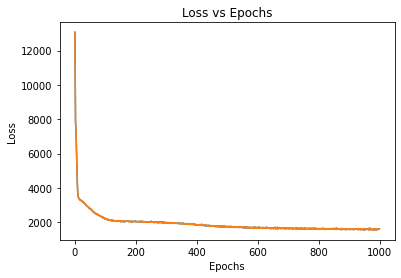

In [128]:
# Create column transformer (this will help us normalize/preprocess our data)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    #(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

y = df['charges']
X = df.drop(columns='charges', axis=1)

ct.fit(X)
X_normal = ct.transform(X)

# Let's split the data into train, test and validation dataset.
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.4, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 42) # 0.25 x 0.8 = 0.2




#Build a NN model to fit our data.
# 1. Set the seed
tf.random.set_seed(42)

# 2. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)                                         
])


# 3. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(),
                metrics=["mae"])

# 4. Fit the model
history_7 = model_7.fit(X_train, y_train, epochs=1000)

fig, ax = plt.subplots(1)
ax.plot(pd.DataFrame(history_7.history))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
plt.show()

In [129]:
loss, mae = model_7.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1637.2926 - mae: 1637.2926


In [131]:
y_val_pred = model_7.predict(X_val)

In [168]:
mae = tf.metrics.mean_absolute_error(y_true=y_val.to_numpy()[0], 
                                     y_pred=y_val_pred[0])
print("MAE = "+str(mae))

mae = tf.metrics.mean_absolute_error(y_true=y_val.to_numpy(), 
                                     y_pred=y_val_pred)
print("count = "+str(len(mae)))
print("MAE = "+str(mae))

# I don't understand why the above two mae show so different values. The first
# one is only supposed to be for the first row, but the second is for all rows.
# But the first row in all rows doesn't match the mae of just the first row.

average = 0
count = 0
for i in range(len(y_val_pred)):
  mae = tf.metrics.mean_absolute_error(y_true=y_val.to_numpy()[i], 
                                     y_pred=y_val_pred[i])
  print(mae)
  average += mae
  count += 1

average /= count
print("Average = "+str(average)) 

MAE = tf.Tensor(370.48047, shape=(), dtype=float32)
count = 268
MAE = tf.Tensor(
[13865.058   9836.579   9580.905  11609.759  28044.      9965.335
 12283.911   9318.977   9091.651   9003.716   9550.004   9685.092
 13487.166  12614.58    9691.551   9249.45   10215.968  11254.489
  9213.287  37350.008  10903.319   9255.879   9102.644  12934.151
 17744.846  12648.159  10406.591  11605.044  33679.832   9003.543
 22785.873   9240.914  10299.963   8993.545  21356.943   9075.871
  9075.739  10326.832   9105.742   9776.555   9090.791  19625.178
  9132.881   9023.542  10284.17    9400.022   9004.886   9128.601
  9188.348   9625.97   11289.264  20720.01    9322.712   9784.053
 10600.074   9648.579  11080.633   9121.634  32676.082  11936.912
 12671.8955  9744.849  12445.573   9335.723  10165.815  10487.408
 10078.526   8997.479  10290.595   9753.206  22945.518  11029.131
 10991.709  10298.784   9195.693   9889.432  13685.106  12511.455
  9333.465   9828.269  10114.653   9659.362   9017.617   9374

# THE END